# Deep Learning vs. Traditional Machine Learning
## Advanced Machine Learning in Finance - Individual Project

The aim of this project is to compare the performance of two machine learning models, N-Beats and XGBoost, for predicting sales figures. The challenge is to use available data that has a correlation with the sales of various companies, such as credit card transactions and geographical data, to predict the quarterly sales figures.

The goal is to compare the accuracy of predictions for the current quarter, as well as the next couple of quarters, between N-Beats and XGBoost.

N-Beats is a deep learning model designed specifically for time-series forecasting, while XGBoost is a popular tree-based model used for various types of predictive modeling. This project aim to give insights into comparative forecasting results from these two models and their applications in the field of sales prediction.

The outcome of this project will be a comparison between the two models, including a discussion of the results and their implications for businesses and organizations looking to improve their financial forecasting capabilities.

In [1]:
import darts
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import torch 
import os
import sys
import utils
from darts.dataprocessing.transformers import (
    Scaler,
    MissingValuesFiller,
    Mapper,
    InvertibleMapper,
)
from darts import TimeSeries
import darts.metrics as metrics
from darts.models import NBEATSModel
from darts.dataprocessing.transformers import Scaler

/Users/eirikbaekkelund/opt/anaconda3/envs/darts/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
folder = 'exabel_data'
exabel_files = utils.files_from_folder(folder_name=folder)
spendings_agg = exabel_files[-1]
revenue_file = exabel_files[0]
df_revenue = utils.create_df(folder=folder, file_name=revenue_file)
df_spendings = utils.create_df(folder=folder, file_name=spendings_agg)


In [8]:
print(df_revenue.shape)
print(df_spendings.shape)

(11046, 8)
(3993, 8)


In [7]:
def create_stationary_covariates(df):
    """ 
    
    """
    df['time'] = pd.to_datetime(df['time'])
    df['year'] = df['time'].dt.year
    df['month'] = df['time'].dt.month
    df['quarter'] = df['time'].dt.quarter

    return df

((2972, 8), (3993, 8))

In [29]:
# Group the data by the 'ticker' column
grouped = spendings_agg.groupby('ticker').apply()
grouped.head(10)

,name,mic,ticker,factset_id,bloomberg_ticker,time,nw_total_sales_a_total,nw_total_sales_b_total
0,"1-800-FLOWERS.COM, Inc.",XNAS,FLWS,002JD9-E,FLWS US,2019-03-31,54356.41,NaN
1,"1-800-FLOWERS.COM, Inc.",XNAS,FLWS,002JD9-E,FLWS US,2019-06-30,54514.94,NaN
2,"1-800-FLOWERS.COM, Inc.",XNAS,FLWS,002JD9-E,FLWS US,2019-12-29,41047.13,NaN
3,"1-800-FLOWERS.COM, Inc.",XNAS,FLWS,002JD9-E,FLWS US,2020-03-29,60962.10,NaN
4,"1-800-FLOWERS.COM, Inc.",XNAS,FLWS,002JD9-E,FLWS US,2020-06-28,58101.76,33479.59
...,...,...,...,...,...,...,...,...
3980,"lululemon athletica, Inc.",XNAS,LULU,06B3CZ-E,LULU US,2019-11-03,83532.26,37889.27
3981,"lululemon athletica, Inc.",XNAS,LULU,06B3CZ-E,LULU US,2020-02-02,170870.52,70525.88
3982,"lululemon athletica, Inc.",XNAS,LULU,06B3CZ-E,LULU US,2020-05-03,91155.77,38798.29
3983,"lululemon athletica, Inc.",XNAS,LULU,06B3CZ-E,LULU US,2020-08-02,139472.10,60155.86


In [24]:
test_a.tail(30)

,name,mic,ticker,factset_id,bloomberg_ticker,time,nw_total_sales_a_total,nw_total_sales_b_total
3957,"fuboTV, Inc.",XNYS,FUBO,00CG0Y-E,FUBO US,2022-06-30,264568.13,59735.75
3958,"fuboTV, Inc.",XNYS,FUBO,00CG0Y-E,FUBO US,2022-09-30,280847.87,66515.55
3962,"iMedia Brands, Inc.",XNAS,IMBI,000Y9R-E,IMBI US,2019-05-04,145950.78,30059.41
3963,"iMedia Brands, Inc.",XNAS,IMBI,000Y9R-E,IMBI US,2019-08-03,141268.37,22846.49
3964,"iMedia Brands, Inc.",XNAS,IMBI,000Y9R-E,IMBI US,2019-11-02,103129.22,18915.70
3965,"iMedia Brands, Inc.",XNAS,IMBI,000Y9R-E,IMBI US,2020-02-01,100147.00,17675.48
3966,"iMedia Brands, Inc.",XNAS,IMBI,000Y9R-E,IMBI US,2020-05-02,95912.41,17359.48
3967,"iMedia Brands, Inc.",XNAS,IMBI,000Y9R-E,IMBI US,2020-08-01,134802.89,18115.02
3968,"iMedia Brands, Inc.",XNAS,IMBI,000Y9R-E,IMBI US,2020-10-31,114148.49,17984.93
3969,"iMedia Brands, Inc.",XNAS,IMBI,000Y9R-E,IMBI US,2021-01-30,130389.95,17920.56


In [81]:
apl = utils.create_df('itunes_18-19.csv')
apl = utils.split_column(apl, delimiter=';', column=';date;avg_ticket_amount_a;num_customers_a;num_transactions_a;total_sales_a')
apl = utils.convert_columns_to_numeric(apl)
apl = utils.set_date(apl)
apl.head()


,date,avg_ticket_amount_a,num_customers_a,num_transactions_a,total_sales_a
0,2018-05-01,10.38,16,22,228.30
1,2018-05-02,29.08,11,14,407.10
2,2018-05-03,6.72,8,13,87.34
3,2018-05-04,20.59,10,14,288.30
4,2018-05-06,8.72,17,21,183.20


<AxesSubplot: >

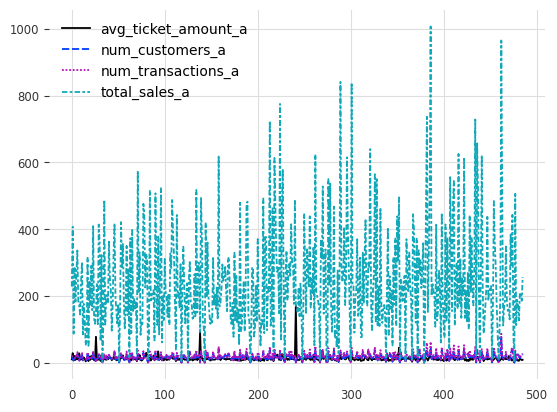

In [82]:
sns.lineplot(data=apl)

In [84]:
def create_darts_series_from_df(df, time_col='date', freq='D'):
    """  
    
    """
    return TimeSeries.from_dataframe(df=df, time_col=time_col, freq=freq)

def series_scale(series):
    scaler = Scaler()
    return scaler.fit_transform(series)

def series_rescale(series):
    scaler = Scaler()
    return scaler.inverse_transform(series)

def series_fill_missing_vals(series):
    filler = MissingValuesFiller()
    return filler.transform(series=series, method='quadratic')
    
def series_train_test(series, proportion=0.75):
    train, validation = series.split_before(proportion)
    return train, validation

In [85]:
series = create_darts_series_from_df(apl)
series = series_fill_missing_vals(series)
series_train, series_val = series_train_test(series=series)

In [87]:
model = NBEATSModel(input_chunk_length=24, output_chunk_length=12)
model.fit(series_train)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 6.8 M 
---------------------------------------------------
6.8 M     Trainable params
1.9 K     Non-trainable params
6.8 M     Total params
54.154    Total estimated model params size (MB)


Epoch 99: 100%|██████████| 12/12 [00:02<00:00,  5.06it/s, loss=41.9, train_loss=37.70]      

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 12/12 [00:02<00:00,  5.05it/s, loss=41.9, train_loss=37.70]


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00,  4.51it/s]


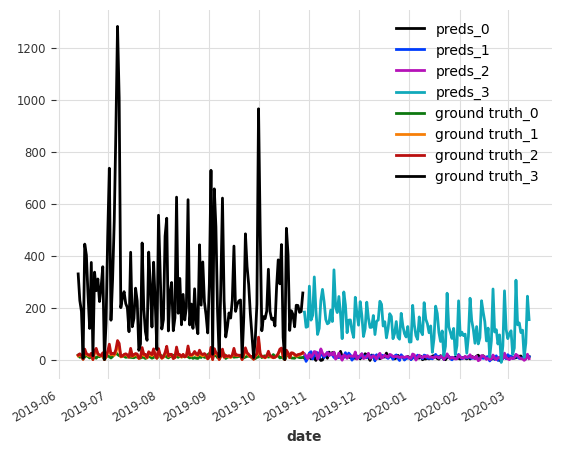

In [89]:
preds = model.predict(len(series_val), series=series);
preds.plot(label='preds');
series_val.plot(label='ground truth');
plt.legend()

In [91]:
preds

<TimeSeries (DataArray) (date: 138, component: 4, sample: 1)>
array([[[ 6.31719151e+00],
        [ 2.06457178e+01],
        [ 2.20793678e+01],
        [ 1.83313332e+02]],

       [[ 1.28025308e+01],
        [-6.02096113e+00],
        [ 1.46036063e+01],
        [ 1.25003439e+02]],

       [[ 1.15253970e+01],
        [ 9.20733330e+00],
        [ 4.60229141e+00],
        [ 1.27807830e+02]],

       [[ 1.67765923e+01],
        [ 2.57538739e+01],
        [ 2.14999433e+01],
        [ 2.83218053e+02]],

...

       [[ 1.17870070e+01],
        [ 5.47195212e+00],
        [-2.08457893e+00],
        [ 9.51234641e+00]],

       [[ 1.24682550e+01],
        [ 3.80756606e+00],
        [ 2.77398858e+00],
        [ 6.42098213e+01]],

       [[ 1.22619783e+01],
        [ 1.76525012e+01],
        [ 2.14047362e+01],
        [ 2.44502130e+02]],

       [[ 1.19404575e+01],
        [ 1.24686119e+01],
        [ 4.55946227e+00],
        [ 1.54390134e+02]]])
Coordinates:
  * date       (date) datetime64[ns] 2019-10-29 2019-10-30 ... 2020-03-14
  * component  (component) object 'avg_ticket_amount_a' ... 'total_sales_a'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [95]:
preds = fill_missing_vals(preds)

In [96]:
metrics.mape(actual_series=series_val, pred_series=preds)

ValueError: Neither `start` nor `end` can be NaT

## Improvement strategies
* Include stationary future covariates: geolocation, seasonal data
* Include stationary past covariates: same as above, + ideas?
* Include past time series
* Include likelihood for bayesian uncertainty quantification
* Add constraints to model (e.g. cannot have negative values)
* Investigate imputation of missing values 